# Multilayer Perceptrone for detecting hand written digit

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
import numpy as np
import pandas as pd

In [53]:
(xtrain, ytrain),(xtest, ytest) = keras.datasets.mnist.load_data()

In [54]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

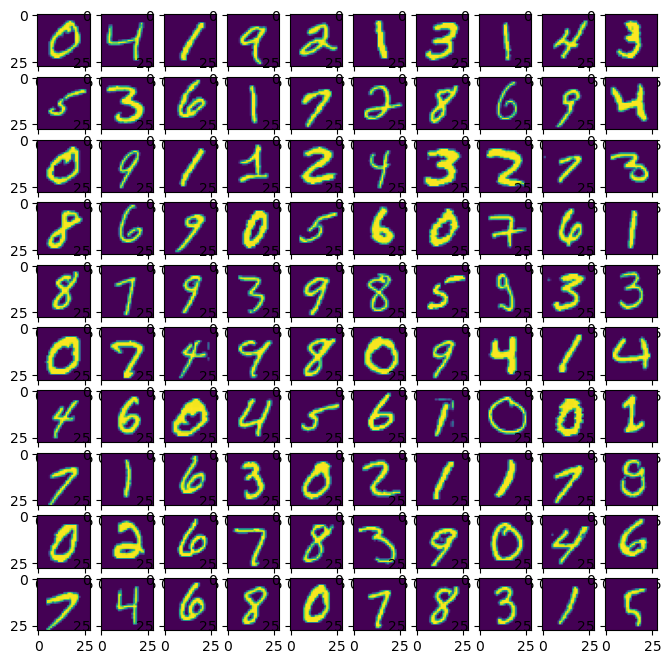

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = xtrain[i]  
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [26]:
xtest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

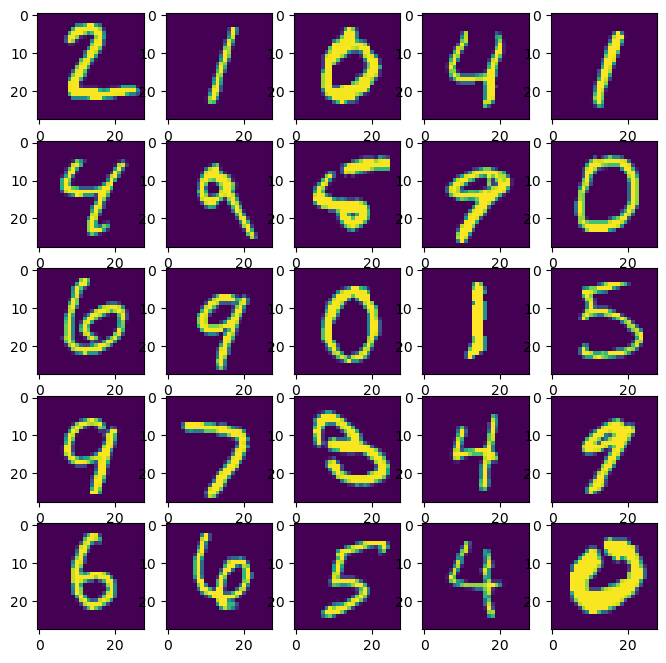

In [4]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = xtest[i]  
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [6]:
# scaling or normalization
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255

In [7]:
# flatten the 28*28 pixel image
xtrainflatten=xtrain_scaled.reshape(len(xtrain),28*28)
xtrainflatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
xtestflatten=xtest_scaled.reshape(len(xtest),28*28)
xtestflatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
xtrainflatten.shape

(60000, 784)

In [10]:
xtestflatten.shape

(10000, 784)

In [26]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dense(25, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xtrainflatten, ytrain, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8375 - loss: 0.6781
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9679 - loss: 0.1203
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9791 - loss: 0.0740
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9840 - loss: 0.0524
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9875 - loss: 0.0405
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9906 - loss: 0.0314
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9927 - loss: 0.0244
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9929 - loss: 0.0246
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9947 - loss: 0.0185
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9946 - loss: 0.0173


In [27]:
score = model.evaluate(xtestflatten,ytest)
score

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0947


[0.08064502477645874, 0.9772999882698059]

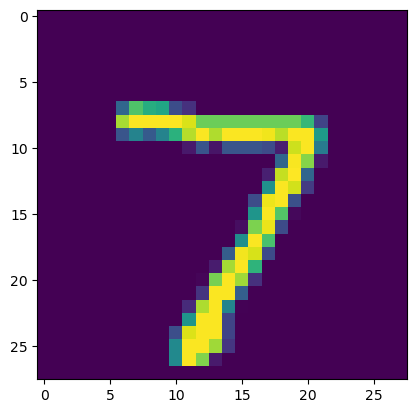

In [28]:
plt.imshow(xtest[0])

In [29]:
yprediction = model.predict(xtestflatten)
yprediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([0.0142233 , 0.02997394, 0.03401584, 0.00757664, 0.02403316,
       0.01789395, 0.01618796, 0.99967074, 0.04353546, 0.16425166],
      dtype=float32)

In [30]:
ypred=max(yprediction[0])
ypred

0.99967074

In [31]:
# finding the index of the maximum value among the 10 results of the output layer
np.argmax(yprediction[0])

7

In [32]:
ypredicted = [np.argmax(i) for i in yprediction]
ypredicted[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [33]:
cm=tf.math.confusion_matrix(labels = ytest, predictions=ypredicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    1,    3,    1,    0,    2,    2,    2,    3,    1],
       [   0, 1127,    1,    0,    0,    1,    2,    0,    4,    0],
       [   2,    3, 1006,    2,    4,    0,    2,    8,    5,    0],
       [   0,    0,   14,  976,    0,    8,    0,    4,    3,    5],
       [   0,    0,    4,    0,  956,    0,    5,    2,    1,   14],
       [   1,    0,    0,   12,    1,  868,    1,    1,    7,    1],
       [   2,    2,    0,    0,    5,    2,  942,    1,    4,    0],
       [   0,    6,    9,    2,    0,    0,    1,  998,    5,    7],
       [   2,    1,    4,    3,    3,    2,    1,    2,  956,    0],
       [   0,    5,    0,    3,    7,    4,    0,    3,    8,  979]])>

Text(9.444444444444452, 0.5, 'Truth')

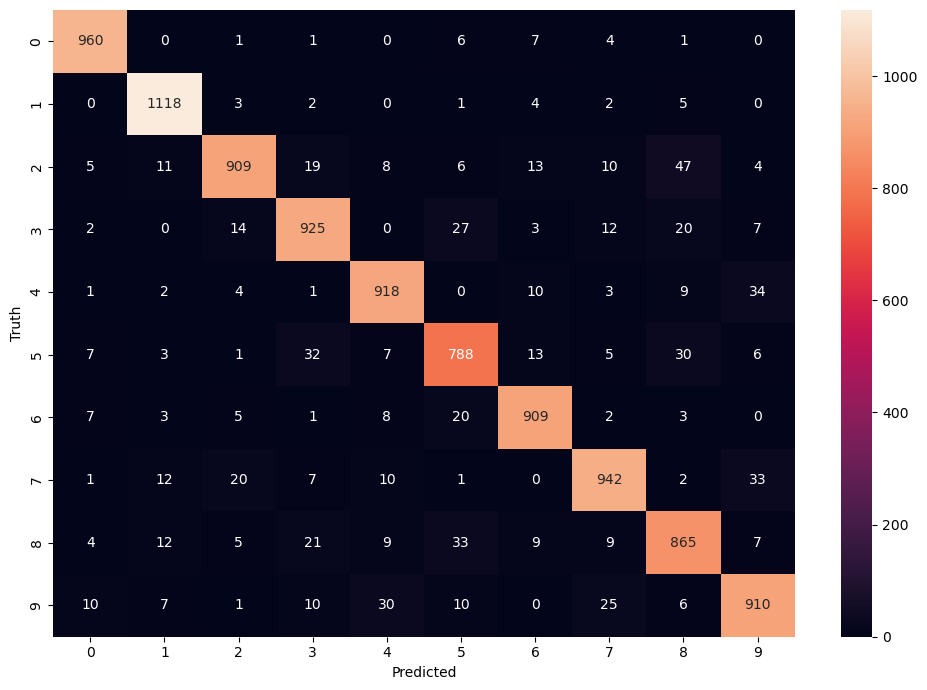

In [46]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Multilayer Perceptrone for detecting image

In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [55]:
(xtrain, ytrain),(xtest,ytest)=keras.datasets.cifar10.load_data()

In [37]:
xtrain.shape

(50000, 32, 32, 3)

In [41]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

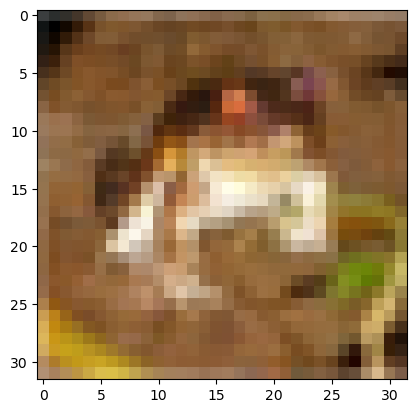

In [49]:
plt.imshow(xtrain[0])

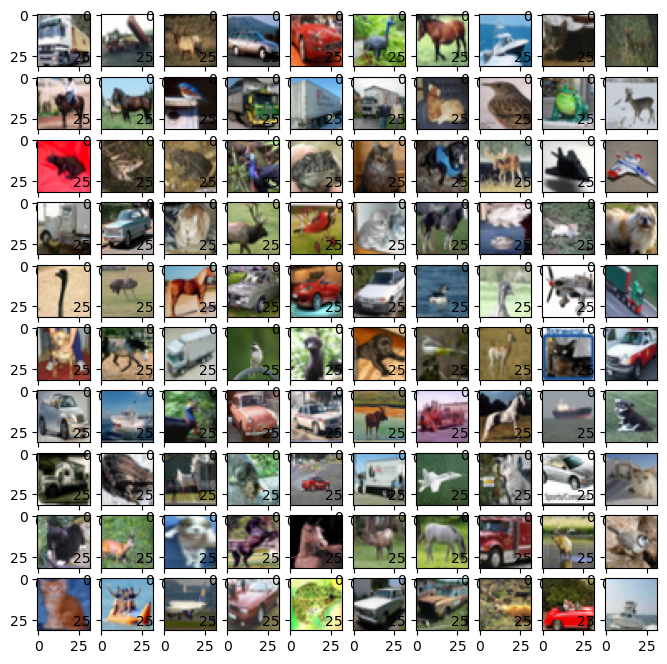

In [50]:
fig = plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = xtrain[i]  
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [56]:
xtest.shape

(10000, 32, 32, 3)

In [46]:
xtest[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

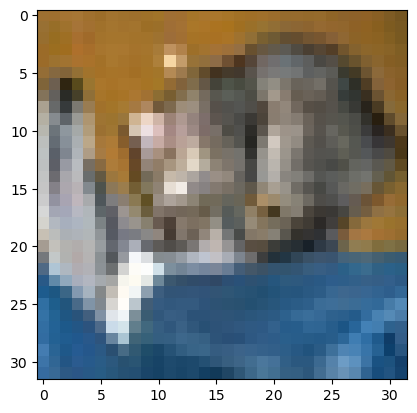

In [45]:
plt.imshow(xtest[0])

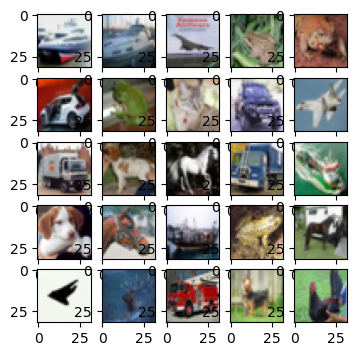

In [51]:
fig = plt.figure(figsize=(4, 4))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = xtest[i]  
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [39]:
ytrain.shape

(50000, 1)

In [40]:
ytest.shape

(10000, 1)

In [57]:
#normalization
xtrainn=xtrain/255
xtestn=xtest/255

In [58]:
xtrainflatten=xtrainn.reshape(len(xtrainn),32*32*3)
xtestflatten=xtestn.reshape(len(xtest),32*32*3)

In [60]:
xtrainflatten.shape

(50000, 3072)

In [62]:
xtrainflatten[0].shape

(3072,)

In [63]:
xtrainflatten[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [65]:
ytest[0]

array([3], dtype=uint8)

In [70]:
model=keras.Sequential([
    keras.layers.Dense(600,input_shape=(3072,),activation='relu'),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(50,activation='sigmoid'),
    keras.layers.Dense(20,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(xtrainflatten,ytrain,epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step - accuracy: 0.1701 - loss: 2.1802
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.3254 - loss: 1.8659
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.3755 - loss: 1.7296
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.4089 - loss: 1.6505
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4331 - loss: 1.5850
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4510 - loss: 1.5400
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4670 - loss: 1.4985
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4786 - loss: 1.4608
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4845 - loss: 1.4404
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.4896 - loss: 1.4240
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5034 - loss: 1.3875
Epoch 12

# Multilayer Perceptrone for classifying medication adherence level

In [ ]:
import pandas as pd
data = pd.read_csv('C:/Users/Ewunetie/OneDrive - University of Gondar,/2022-2023 files/Courses/ML Project/Data/Filt_35000.csv')  
data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(data['year'], data['per capita income (US$)'],color="green",marker='+')

In [ ]:
X = data.drop(columns = ['1250'], axis=1)
y = data['1250']
import os
from sklearn.model_selection import train_test_split 
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =10)
from sklearn.metrics import roc_curve, auc,confusion_matrix,classification_report

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(max_iter=20000)
model.fit(x_train, y_train)

# model.score(x_test, y_test)

y_train_pred = model.predict(x_train)
train_accuracy = model.score(x_train, y_train)

y_test_pred = model.predict(x_test)
test_accuracy = model.score(x_test, y_test)

MLPRegressor = {
        'Modele_name': ['MLPRegressor'],
        'Train_accuracy': [train_accuracy],
        'Test_accuracy': [test_accuracy]
    }
MLPRegressor = pd.DataFrame(MLPRegressor)
MLPRegressor

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

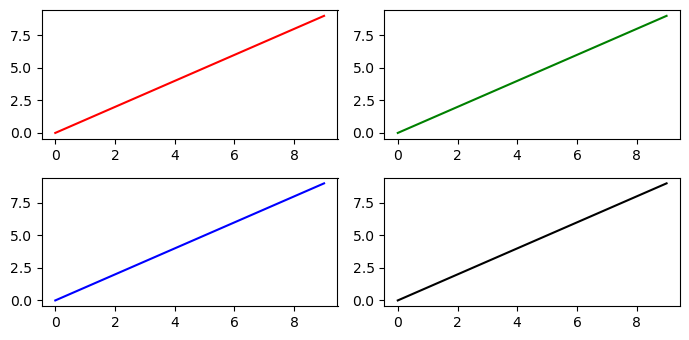

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(range(10), 'r') #row=0, col=0
ax[1, 0].plot(range(10), 'b') #row=1, col=0
ax[0, 1].plot(range(10), 'g') #row=0, col=1
ax[1, 1].plot(range(10), 'k') #row=1, col=1
plt.show()

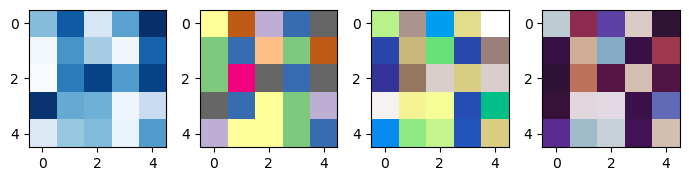

In [16]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
data = np.random.rand(5, 5)
plt.subplot(1, 4, 1)
plt.imshow(data, cmap="Blues_r")
plt.subplot(1, 4, 2)
plt.imshow(data, cmap="Accent_r")
plt.subplot(1, 4, 3)
plt.imshow(data, cmap="terrain_r")
plt.subplot(1, 4, 4)
plt.imshow(data, cmap="twilight_shifted_r")
plt.show()